In [104]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [105]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#what is header = 9? why these 10 files and not other 8?

allmales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales={}
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

print allfemales['all']['Median income'][1]

22063


In [106]:
#print allmales['all'].columns
#print allfemales['all'].columns

In [107]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        #if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

for f in allfemales:
    nonreal  = allfemales[f].applymap(np.isreal)
    for o in allfemales[f].columns :
        #if nonreal.sum()[o]>1 and nonreal.sum()[o]<49:
            allfemales[f][o][~nonreal[o]] = np.float('NaN')
            allfemales[f][o] = allfemales[f][o].astype(float)

/Users/rachelcohen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rachelcohen/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [108]:
type(allfemales['all']['Median income'])
print allfemales['all']['Median income'][1]

22063.0


In [109]:
#tried scatter matrix - plotted everything but completely illegible
#scatter_matrix (allfemales['all'], s = 300, figsize=(16, 16), diagonal='kde')

allfemales['all'].head(10)
#looking just at a few rows shows what data is in the spreadsheets - we want to the total row(1) from the Median Income column for each group

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,NaN,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,NaN,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,NaN,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.650,0.0162
5,NaN,774,592,57,0,21,18,4,4,0,...,0,0,0,15,1635,65,7908,2005,0.916,0.0148
6,NaN,26923,770,1294,2750,5261,5022,4252,2990,1924,...,0,0,0,0,11686,70,12453,71,0.258,0.0025
7,NaN,3386,515,559,363,1428,232,130,72,30,...,0,0,0,0,7950,71,7316,129,0.315,0.0088
8,NaN,1541,759,409,257,74,9,17,5,3,...,0,0,0,0,2569,180,3413,149,0.464,0.0139
9,NaN,619,79,58,48,68,56,113,49,31,...,0,0,6,0,12501,760,13839,927,0.420,0.0288


In [110]:
allmales['all'].head(10)

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,NaN,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,NaN,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.0040
4,NaN,7014,1478,280,342,231,556,144,377,122,...,0,18,0,516,19557,1391,34247,1291,0.630,0.0092
5,NaN,1518,804,62,66,26,75,15,70,14,...,0,2,3,83,2359,106,20918,2837,0.820,0.0168
6,NaN,21454,555,859,919,1784,2250,3063,3329,3282,...,0,0,0,0,15974,96,15892,86,0.237,0.0028
7,NaN,2667,298,283,447,1041,225,126,78,78,...,0,0,0,0,8232,95,8374,174,0.298,0.0113
8,NaN,456,312,97,30,12,2,2,0,0,...,0,0,0,0,1829,117,2123,236,0.571,0.0275
9,NaN,2899,545,385,250,178,228,189,140,175,...,0,0,0,0,11010,529,14810,487,0.490,0.0094


In [111]:
med_male = allmales['all']['Median income'][1]
med_white = allmales['white']['Median income'][1]
med_black = allmales['black']['Median income'][1]
med_hispanic = allmales['hispanic']['Median income'][1]
med_asian = allmales['asian']['Median income'][1]
print [med_male, med_white, med_black, med_hispanic, med_asian]


[35228.0, 40122.0, 24855.0, 25411.0, 40153.0]


In [112]:
mf = allfemales['all']['Median income'][1]
mfw = allfemales['white']['Median income'][1]
mfb = allfemales['black']['Median income'][1]
mfh = allfemales['hispanic']['Median income'][1]
mfa = allfemales['asian']['Median income'][1]
print [mf, mfw, mfb, mfh, mfa]

[22063.0, 23780.0, 20044.0, 17762.0, 24840.0]


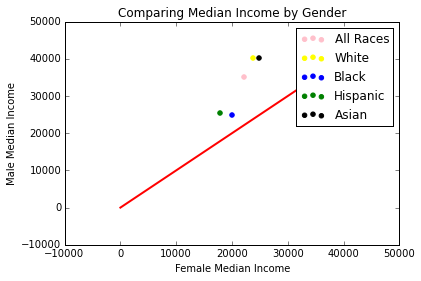

In [168]:
pl.scatter(mf, med_male, color='pink', label = 'All Races')
pl.scatter(mfw, med_white, color='yellow', label = 'White')
pl.scatter(mfb, med_black, color='blue', label = 'Black')
pl.scatter(mfh, med_hispanic, color='green', label = 'Hispanic')
pl.scatter(mfa, med_asian, color='black', label = 'Asian')

x = numpy.arange(0,45000,1)
pl.plot(x, x, color='red', linewidth=2.0)
pl.legend(bbox_to_anchor=(1, 1))
pl.xlabel('Female Median Income')
pl.ylabel('Male Median Income')
pl.title('Comparing Median Income by Gender')

This simple chart shows that for each group, median male income exceeds median female income. If the total median incomes were the same regardless of gender, all points would appear on the red line with a slope of 1 and intercept of 0.

In [139]:
#print len(allfemales['all'])
#print len(allmales['all'])

In [140]:
male_array = np.array([mf, mfw, mfb, mfh, mfa])
female_array = np.array([med_male, med_white, med_black, med_hispanic, med_asian])

In [141]:
cor = stats.spearmanr(male_array, female_array)
print cor

male_array.std()/female_array.std()
beta1=cor[0]*male_array.std()/female_array.std()
beta0=male_array.mean()-beta1*female_array.mean()

print beta1
print beta0

(0.90000000000000002, 0.037386073468498628)
0.338176888526
10485.9510732


In [142]:
#showing a high correlation with a low p value. This shows correlation between race and average income.

In [143]:
all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

In [144]:
allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

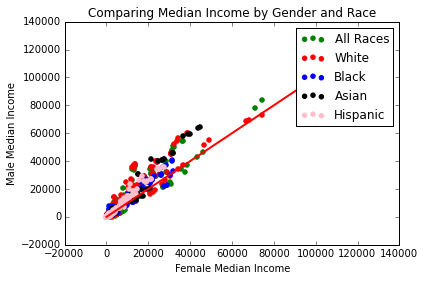

In [170]:
pl.scatter(all_females, all_males, color = 'purple')
pl.scatter(allfemales['all'], allmales['all'], color ='green', label = 'All Races')
pl.scatter(allfemales['white'], allmales['white'], color = 'red', label = 'White')
pl.scatter(allfemales['black'], allmales['black'], color = 'blue', label = 'Black')
pl.scatter(allfemales['asian'], allmales['asian'], color = 'black', label = 'Asian')
pl.scatter(allfemales['hispanic'], allmales['hispanic'], color = 'pink', label = 'Hispanic')

x = np.arange(0,120000,1)
pl.plot(x, x, color='red', linewidth=2.0)
pl.legend(bbox_to_anchor=(1, 1))
pl.xlabel('Female Median Income')
pl.ylabel('Male Median Income')
pl.title('Comparing Median Income by Gender and Race')

#what does this chart show?

It seemed like concatanating with the 'all' csv would double-count values (since all is a combination of the other files), so I reran without the all - finding similar results below but with lower max values.

In [146]:
all_males=np.ma.array(np.concatenate([allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_females=np.ma.array(np.concatenate([allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

In [147]:
allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask

In [151]:
allcor = stats.spearmanr(all_females, all_males)
print allcor

(0.84958556111919392, 8.5256216833585171e-56)


High correlation, low p value - there is a relationship between gender and income, with race as a covariant

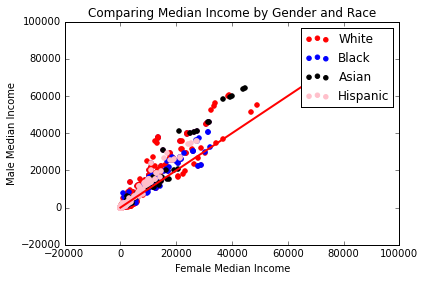

In [171]:
pl.scatter(all_females, all_males, color = 'purple')
#pl.scatter(allfemales['all'], allmales['all'], color ='green')
pl.scatter(allfemales['white'], allmales['white'], color = 'red', label = 'White')
pl.scatter(allfemales['black'], allmales['black'], color = 'blue', label = 'Black')
pl.scatter(allfemales['asian'], allmales['asian'], color = 'black', label = 'Asian')
pl.scatter(allfemales['hispanic'], allmales['hispanic'], color = 'pink', label = 'Hispanic')

x = np.arange(0,90000,1)
pl.plot(x, x, color='red', linewidth=2.0)
pl.legend(bbox_to_anchor=(1, 1))
pl.xlabel('Female Median Income')
pl.ylabel('Male Median Income')
pl.title('Comparing Median Income by Gender and Race')